In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
sta_all_tm = pd.read_csv(r"H:/sta_all_tm.txt",parse_dates=['time'],sep = "\t",index_col = 0)

<Figure size 432x576 with 0 Axes>

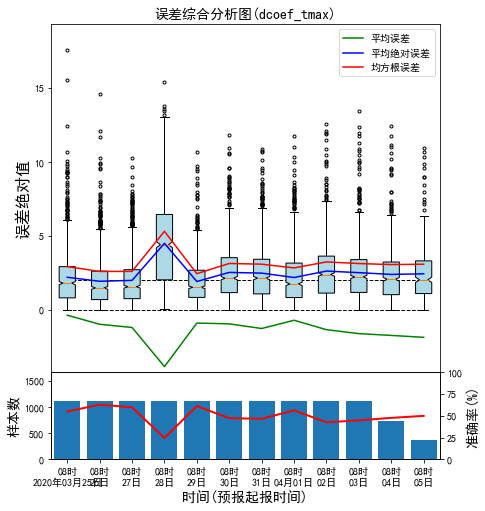

In [16]:
mpd.error_boxplot_abs(sta_all_tm,s = {"member":["tmax_ob","dcoef_tmax"]},g = "time")